In [ ]:
# ANALYSE EXPLORATOIRE DES DONNEES(EXPLORATORY DATA ANALYSIS, EDA)

In [1]:
# Importation des bibliothèques
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Datasets/Clients_Final.csv')

In [3]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,1,0,0,1,0,1,1,5849,0.0,146.412162,360.0,1.0
1,1,1,1,1,0,0,0,4583,1508.0,128.000000,360.0,1.0
2,1,1,0,1,1,1,1,3000,0.0,66.000000,360.0,1.0
3,1,1,0,0,0,1,1,2583,2358.0,120.000000,360.0,1.0
4,1,0,0,1,0,1,1,6000,0.0,141.000000,360.0,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   Property_Area      614 non-null    int64  
 6   Loan_Status        614 non-null    int64  
 7   ApplicantIncome    614 non-null    int64  
 8   CoapplicantIncome  614 non-null    float64
 9   LoanAmount         614 non-null    float64
 10  Loan_Amount_Term   614 non-null    float64
 11  Credit_History     614 non-null    float64
dtypes: float64(4), int64(8)
memory usage: 57.7 KB


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Gender,614.0,0.817590,0.386497,0.0,1.00,1.0,1.00,1.0
Married,614.0,0.648208,0.477919,0.0,0.00,1.0,1.00,1.0
Dependents,614.0,0.744300,1.009623,0.0,0.00,0.0,1.00,3.0
Education,614.0,0.781759,0.413389,0.0,1.00,1.0,1.00,1.0
Self_Employed,614.0,0.133550,0.340446,0.0,0.00,0.0,0.00,1.0
Property_Area,614.0,1.087948,0.815081,0.0,0.00,1.0,2.00,2.0
Loan_Status,614.0,0.687296,0.463973,0.0,0.00,1.0,1.00,1.0
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.50,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.00,1188.5,2297.25,41667.0
LoanAmount,614.0,146.412162,84.037468,9.0,100.25,129.0,164.75,700.0


In [ ]:
# VISUALISATION DES COLONNES

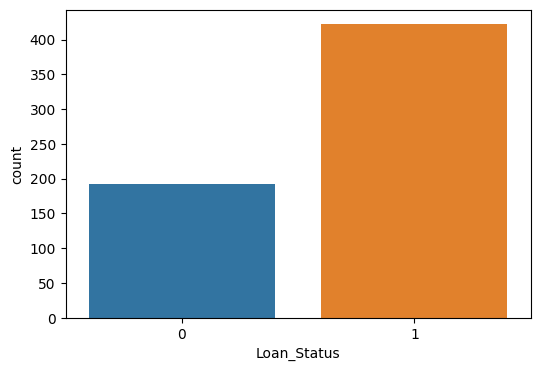

In [15]:
# Le label : Loan_Status
plt.figure(figsize=(6,4))
sns.countplot(x='Loan_Status',data=df);

In [10]:
# Le pourcentage d'octroi de crédit
percent_credits_granted=round(df['Loan_Status'].value_counts()[1]/len(df['Loan_Status'])*100,2)
percent_credits_denied=round(df['Loan_Status'].value_counts()[0]/len(df['Loan_Status'])*100,2)
print(f'le pourcentage des crédits accordés est de : {percent_credits_granted}%')
print(f'le pourcentage des crédits non accordés est de : {percent_credits_denied}%')

le pourcentage des crédits accordés est de : 68.73%
le pourcentage des crédits non accordés est de : 31.27%


In [31]:
# la corrélation des feeatures par rapport au label
df.corr()['Loan_Status'].sort_values()

CoapplicantIncome   -0.059187
LoanAmount          -0.036416
Loan_Amount_Term    -0.020974
ApplicantIncome     -0.004710
Self_Employed       -0.003700
Dependents           0.010118
Gender               0.017987
Married              0.084281
Education            0.085884
Property_Area        0.137545
Credit_History       0.432616
Loan_Status          1.000000
Name: Loan_Status, dtype: float64

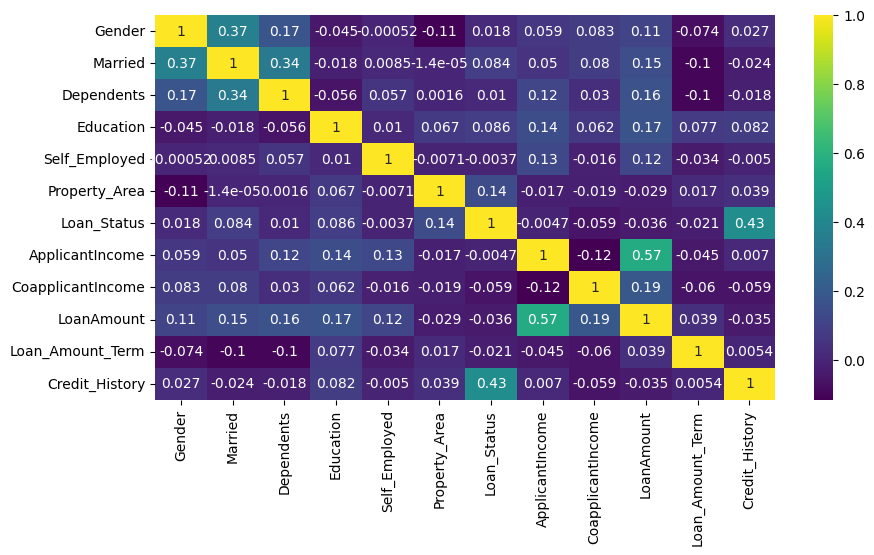

In [35]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),cmap='viridis',annot=True);

C:\Users\makil\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\makil\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


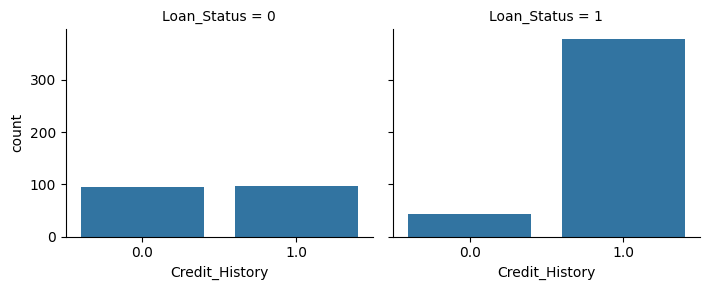

In [26]:
# la feature Credit_History par rapport au label
grid=sns.FacetGrid(df,col='Loan_Status',aspect=1.2)
grid.map(sns.countplot,'Credit_History')

C:\Users\makil\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\makil\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


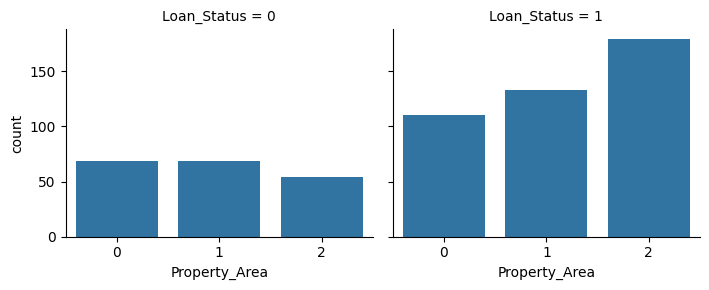

In [37]:
# la feature Property_Area par rapport au label
grid=sns.FacetGrid(df,col='Loan_Status',aspect=1.2)
grid.map(sns.countplot,'Property_Area')

C:\Users\makil\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\makil\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


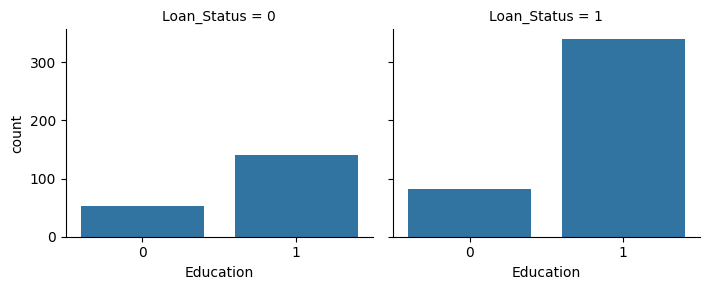

In [38]:
# la feature Education par rapport au label
grid=sns.FacetGrid(df,col='Loan_Status',aspect=1.2)
grid.map(sns.countplot,'Education')

C:\Users\makil\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\makil\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


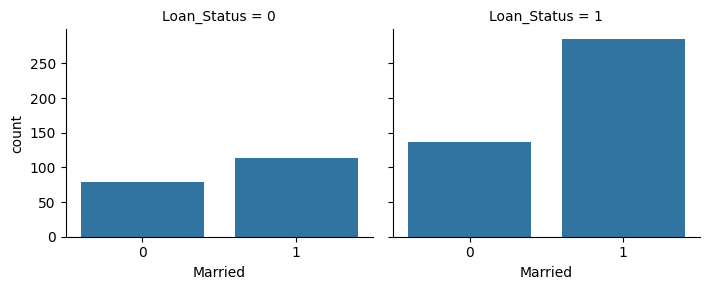

In [39]:
# la feature Married par rapport au label
grid=sns.FacetGrid(df,col='Loan_Status',aspect=1.2)
grid.map(sns.countplot,'Married')

C:\Users\makil\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\makil\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


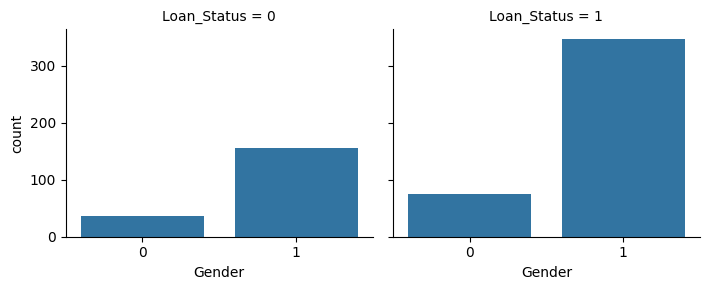

In [40]:
# la feature Gender par rapport au label
grid=sns.FacetGrid(df,col='Loan_Status',aspect=1.2)
grid.map(sns.countplot,'Gender')

C:\Users\makil\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\makil\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


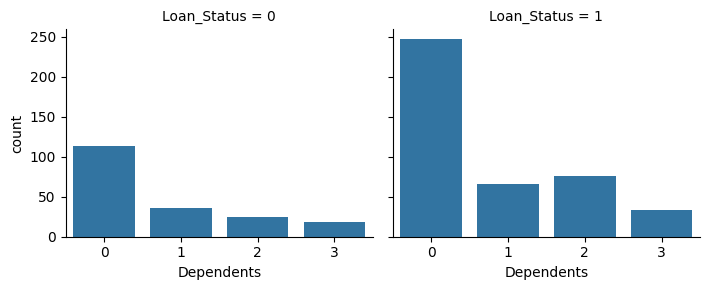

In [41]:
# la feature Dependents par rapport au label
grid=sns.FacetGrid(df,col='Loan_Status',aspect=1.2)
grid.map(sns.countplot,'Dependents')

C:\Users\makil\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\makil\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


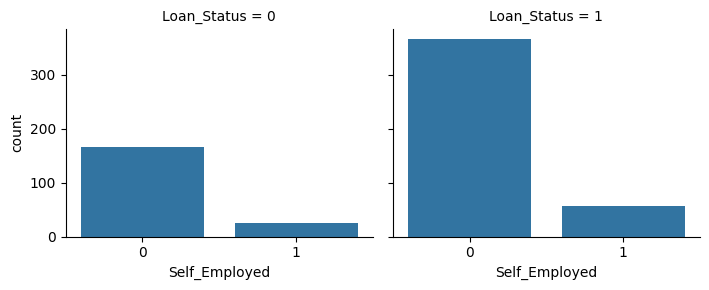

In [42]:
# la feature Self_Employed par rapport au label
grid=sns.FacetGrid(df,col='Loan_Status',aspect=1.2)
grid.map(sns.countplot,'Self_Employed')

<Axes: xlabel='ApplicantIncome', ylabel='LoanAmount'>

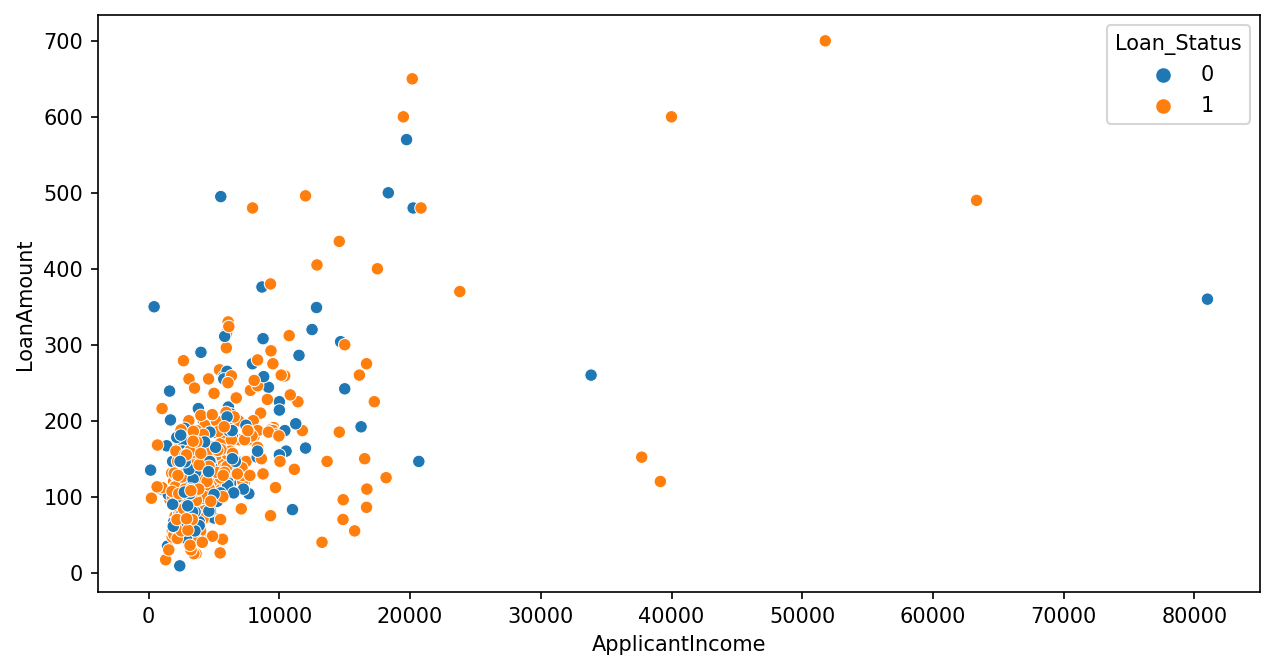

In [50]:
# les features ApplicantIncome et LoanAmount  par rapport au label
plt.figure(figsize=(10,5),dpi=150)
sns.scatterplot(x='ApplicantIncome',y='LoanAmount',data=df,hue='Loan_Status')

<Axes: xlabel='ApplicantIncome', ylabel='Credit_History'>

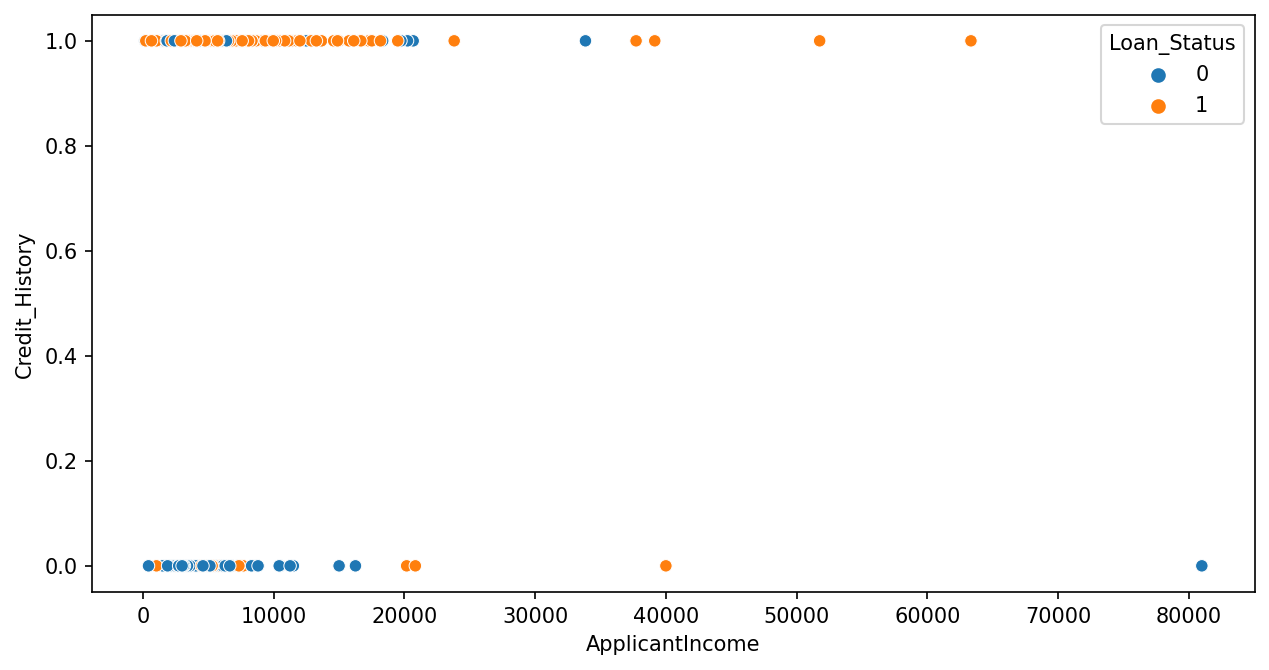

In [51]:
# la feature ApplicantIncome et Credit_History par rapport au label
plt.figure(figsize=(10,5),dpi=150)
sns.scatterplot(x='ApplicantIncome',y='Credit_History',data=df,hue='Loan_Status')

In [55]:
df.groupby('Loan_Status').median()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_Status,,,,,,,,,,,
0,1.0,1.0,0.0,1.0,0.0,1.0,3833.5,268.0,133.5,360.0,1.0
1,1.0,1.0,0.0,1.0,0.0,1.0,3812.5,1239.5,128.0,360.0,1.0


In [ ]:
# MACHINE LEARNING (APPRENTISSAGE AUTOMATIQUE)

In [56]:
# Séparer les features et le label
X = df.drop('Loan_Status',axis=1)
y = df['Loan_Status']

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
# Fractionnement du dataset en set d'entrainement et de test
# test_size est de 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [59]:
print('X_train est de : ', X_train.shape)
print('X_test est de : ', X_test.shape)
print('y_train est de : ', y_train.shape)
print('y_test est de : ', y_test.shape)

X_train est de :  (429, 11)
X_test est de :  (185, 11)
y_train est de :  (429,)
y_test est de :  (185,)


In [60]:
# Mise à l'échelle des données (Normalisation des données)
from sklearn.preprocessing import StandardScaler

In [61]:
scaler = StandardScaler()

In [62]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [63]:
# MODELE DE REGRESSION LOGISTIQUE AVEC UNE CROSS VALIDATION

In [64]:
# Première solution : modèle LogisticRegressionCV
from sklearn.linear_model import LogisticRegressionCV 

In [71]:
# help(LogisticRegressionCV)

In [67]:
log_model = LogisticRegressionCV()

In [68]:
log_model.fit(scaled_X_train,y_train)

LogisticRegressionCV()

In [69]:
log_model.C_

array([2.7825594])

In [72]:
log_model.get_params()

{'Cs': 10,
 'class_weight': None,
 'cv': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratios': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'refit': True,
 'scoring': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0}

In [73]:
# Les coefficients des features
log_model.coef_

array([[-0.02728276,  0.32079182, -0.10906414,  0.18241283,  0.02675004,
         0.27330447, -0.01616168, -0.1469793 , -0.11940848, -0.13892386,
         0.99451417]])

In [74]:
coefficients = pd.Series(index=X.columns,data=log_model.coef_[0])

In [75]:
coefficients = coefficients.sort_values()

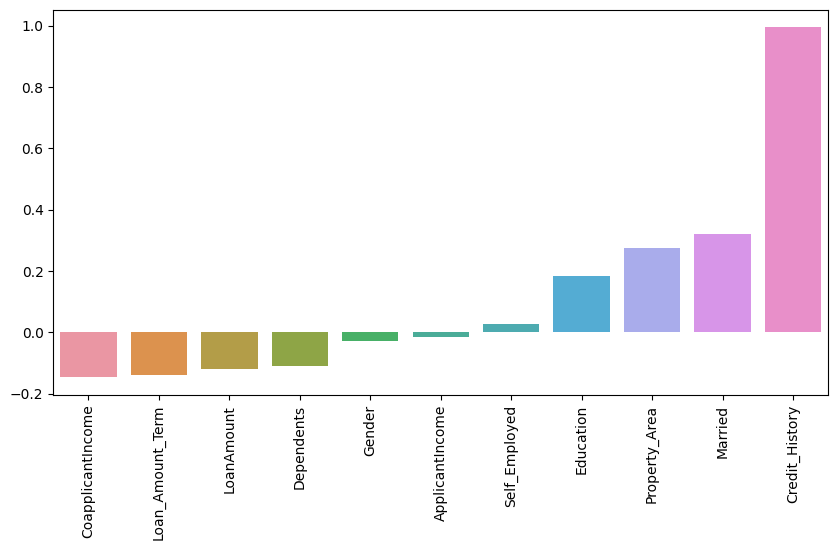

In [78]:
plt.figure(figsize=(10,5))
sns.barplot(x=coefficients.index,y=coefficients.values);
plt.xticks(rotation=90);

In [79]:
# EVALUATION DES PERFORMANCES DU MODELE

In [80]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [81]:
y_pred = log_model.predict(scaled_X_test)

In [82]:
confusion_matrix(y_test,y_pred)

array([[ 29,  35],
       [ 16, 105]], dtype=int64)

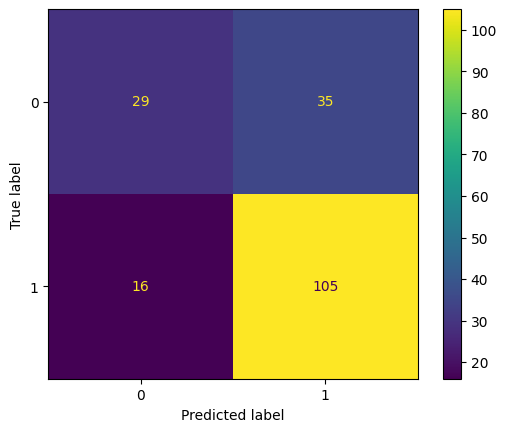

In [83]:
ConfusionMatrixDisplay.from_estimator(log_model,scaled_X_test,y_test);

In [84]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.64      0.45      0.53        64
           1       0.75      0.87      0.80       121

    accuracy                           0.72       185
   macro avg       0.70      0.66      0.67       185
weighted avg       0.71      0.72      0.71       185



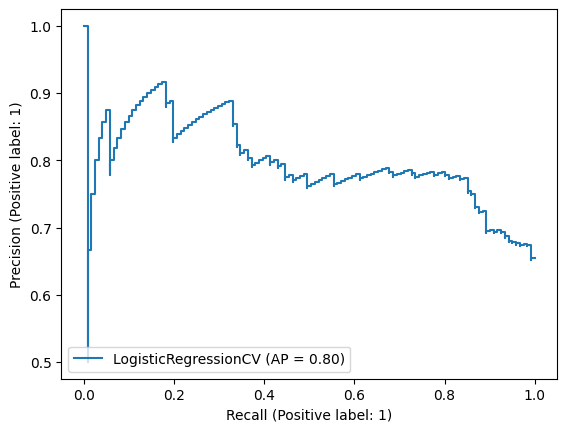

In [121]:
PrecisionRecallDisplay.from_estimator(log_model,scaled_X_test,y_test);

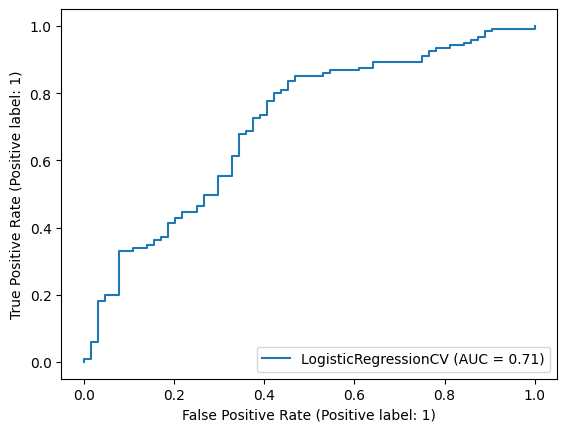

In [122]:
RocCurveDisplay.from_estimator(log_model,scaled_X_test,y_test);

In [ ]:
# Normalisation : Suréchantillonnage des données avec SMOTE

In [87]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from collections import Counter

In [88]:
smote = SMOTE(sampling_strategy='auto',random_state=101)

In [89]:
X_smote, y_smote = smote.fit_resample(scaled_X_train, y_train)

In [90]:
print(Counter(y_train))

Counter({1: 301, 0: 128})


In [91]:
print(Counter(y_smote))

Counter({0: 301, 1: 301})


In [103]:
print(Counter(y_test))

Counter({1: 121, 0: 64})


In [92]:
log_model_smote = LogisticRegressionCV()

In [93]:
log_model_smote.fit(X_smote,y_smote)

LogisticRegressionCV()

In [94]:
log_model_smote.C_

array([0.00077426])

In [95]:
log_model_smote.get_params()

{'Cs': 10,
 'class_weight': None,
 'cv': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratios': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'refit': True,
 'scoring': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0}

In [96]:
log_model_smote.coef_

array([[ 0.00242989,  0.01428698,  0.00151909,  0.02429885,  0.00790222,
         0.02700073,  0.00286271, -0.01701184, -0.01006986, -0.00806278,
         0.11239696]])

In [97]:
coefficients_smote = pd.Series(index=X.columns,data=log_model_smote.coef_[0])

In [98]:
coefficients_smote = coefficients_smote.sort_values()

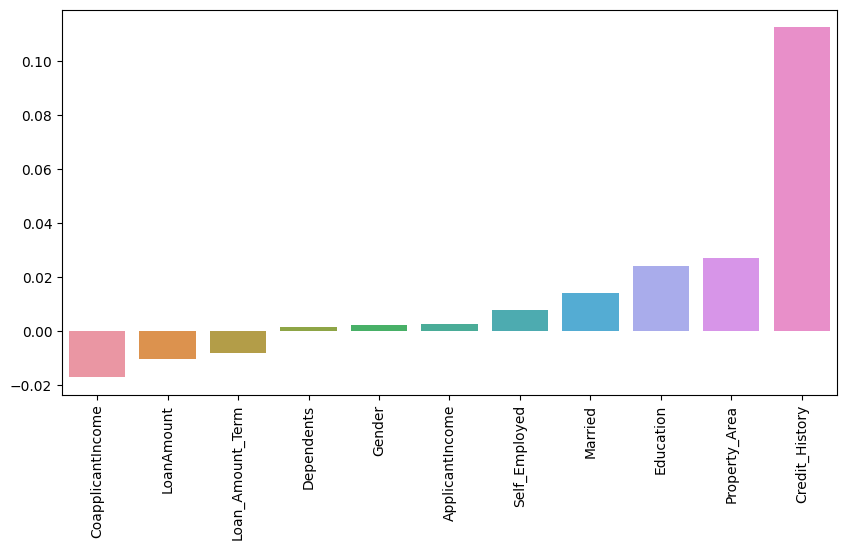

In [99]:
plt.figure(figsize=(10,5))
sns.barplot(x=coefficients_smote.index,y=coefficients_smote.values);
plt.xticks(rotation=90);

In [100]:
y_pred = log_model_smote.predict(scaled_X_test)

In [101]:
confusion_matrix(y_test,y_pred)

array([[ 31,  33],
       [ 19, 102]], dtype=int64)

In [102]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.62      0.48      0.54        64
           1       0.76      0.84      0.80       121

    accuracy                           0.72       185
   macro avg       0.69      0.66      0.67       185
weighted avg       0.71      0.72      0.71       185



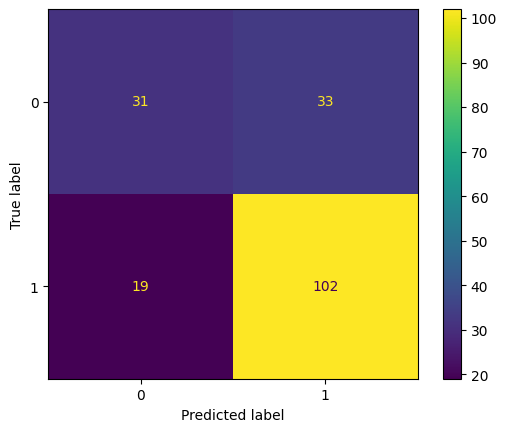

In [104]:
ConfusionMatrixDisplay.from_estimator(log_model_smote,scaled_X_test,y_test);

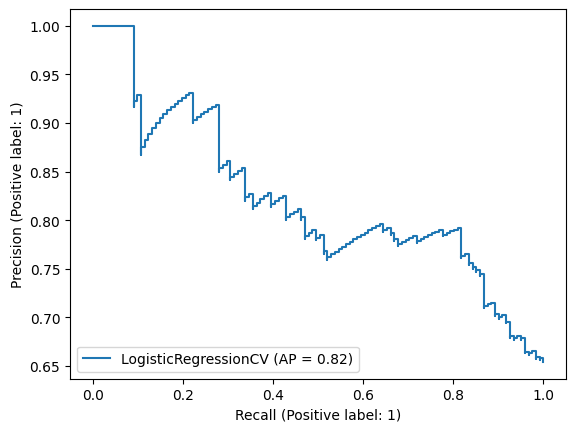

In [119]:
PrecisionRecallDisplay.from_estimator(log_model_smote,scaled_X_test,y_test);

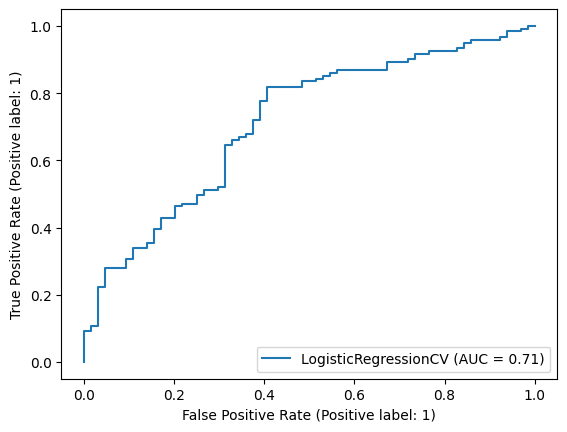

In [120]:
RocCurveDisplay.from_estimator(log_model_smote,scaled_X_test,y_test);

In [105]:
# Normalisation : Suréchantillonnage des données avec ADASYN

In [106]:
adasyn = ADASYN(sampling_strategy='auto',random_state=101)

In [107]:
X_adasyn, y_adasyn = adasyn.fit_resample(scaled_X_train, y_train)

In [108]:
print(Counter(y_adasyn))

Counter({1: 301, 0: 272})


In [109]:
log_model_adasyn = LogisticRegressionCV()

In [110]:
log_model_adasyn.fit(X_adasyn,y_adasyn)

LogisticRegressionCV()

In [111]:
log_model_adasyn.get_params()

{'Cs': 10,
 'class_weight': None,
 'cv': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratios': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'refit': True,
 'scoring': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0}

In [112]:
log_model_adasyn.coef_

array([[ 0.00288178,  0.10818001, -0.03390727,  0.06188135, -0.00917682,
         0.14603456, -0.01709732, -0.04653762, -0.03036583, -0.03607509,
         0.31908453]])

In [113]:
y_pred = log_model_adasyn.predict(scaled_X_test)

In [114]:
confusion_matrix(y_test,y_pred)

array([[36, 28],
       [24, 97]], dtype=int64)

In [115]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.60      0.56      0.58        64
           1       0.78      0.80      0.79       121

    accuracy                           0.72       185
   macro avg       0.69      0.68      0.68       185
weighted avg       0.72      0.72      0.72       185



In [ ]:
# VISUALISATION DES COURBES ROC ET PRECISION_RECALL

In [116]:
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay

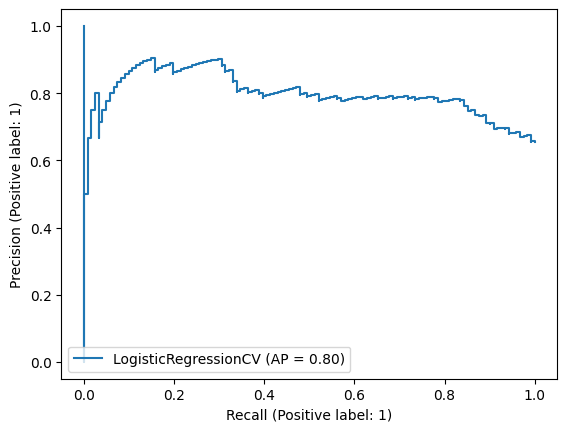

In [117]:
PrecisionRecallDisplay.from_estimator(log_model_adasyn,scaled_X_test,y_test);

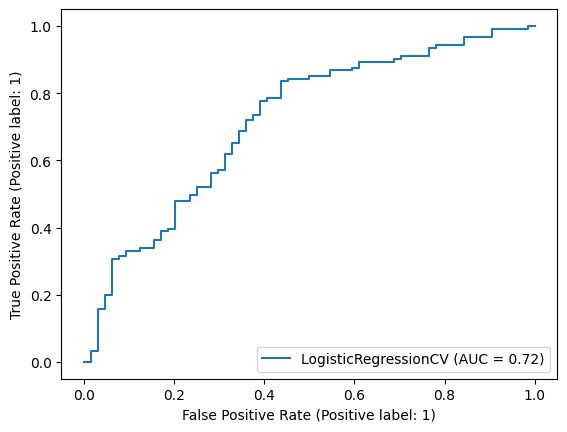

In [118]:
RocCurveDisplay.from_estimator(log_model_adasyn,scaled_X_test,y_test);

In [156]:
df_test = pd.read_csv('dataset_test_Final.csv')

In [157]:
scaled_df_test = scaler.transform(df_test)

In [158]:
# Modèle sans surécchantillonnage
y_pred_data_test = log_model.predict(scaled_df_test)

In [159]:
print(Counter(y_pred_data_test))

Counter({1: 281, 0: 86})


In [160]:
counter_y_pred = Counter(y_pred_data_test)

In [161]:
pourent_y_pred_denied = round(counter_y_pred[0]/len(y_pred_data_test)*100,2)
pourent_y_pred_granted = round(counter_y_pred[1]/len(y_pred_data_test)*100,2)
print('Pourcentage des crédits acceptées : ',pourent_y_pred_granted)
print('Pourcentage des crédits refusées : ',pourent_y_pred_denied)

Pourcentage des crédits acceptées :  76.57
Pourcentage des crédits refusées :  23.43


In [162]:
# Modèle avec surécchantillonnage SMOTE
y_pred_smote_data_test = log_model_smote.predict(scaled_df_test)

In [163]:
print(Counter(y_pred_smote_data_test))

Counter({1: 271, 0: 96})


In [164]:
counter_y_pred_smote = Counter(y_pred_smote_data_test)

In [165]:
pourent_y_pred_denied = round(counter_y_pred_smote[0]/len(y_pred_smote_data_test)*100,2)
pourent_y_pred_granted = round(counter_y_pred_smote[1]/len(y_pred_smote_data_test)*100,2)
print('Pourcentage des crédits acceptées : ',pourent_y_pred_granted)
print('Pourcentage des crédits refusées : ',pourent_y_pred_denied)

Pourcentage des crédits acceptées :  73.84
Pourcentage des crédits refusées :  26.16


In [166]:
# Modèle avec surécchantillonnage ADASYN
y_pred_adasyn_data_test = log_model_adasyn.predict(scaled_df_test)

In [167]:
print(Counter(y_pred_adasyn_data_test))

Counter({1: 264, 0: 103})


In [168]:
counter_y_pred_adasyn = Counter(y_pred_adasyn_data_test)

In [169]:
pourent_y_pred_denied = round(counter_y_pred_adasyn[0]/len(y_pred_adasyn_data_test)*100,2)
pourent_y_pred_granted = round(counter_y_pred_adasyn[1]/len(y_pred_adasyn_data_test)*100,2)
print('Pourcentage des crédits acceptées : ',pourent_y_pred_granted)
print('Pourcentage des crédits refusées : ',pourent_y_pred_denied)

Pourcentage des crédits acceptées :  71.93
Pourcentage des crédits refusées :  28.07


In [171]:
# log_model.predict_proba(scaled_df_test)